# Transform images.
Two ways: 1) use PIL image format and then the torchvision.transforms. 2) prepare the images into several folders and then ImageFolder. In the NHTS case, we don't know the exact dependent variables, so the second approach cannot work. The first approach can be slow since we have to iterate over images one by one to perform the transformation.

Where can you find tutorials?
https://colab.research.google.com/drive/109vu3F1LTzD1gdVV6cho9fKGx7lzbFll#scrollTo=yLEwF_2RzGs0

https://pytorch.org/tutorials/beginner/data_loading_tutorial.html?highlight=transforms

Both are sort of complicated. You shall just explore by yourself...


In [75]:
!pwd

/home/jtl/Documents/shenhao/torch_tutorial/0_pytorch_online_tutorial


In [31]:
import tensorflow as tf
from torchvision import datasets, models, transforms
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from PIL import Image

import util
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time


In [50]:
#
x_train_images_ = np.load("data_shenhao/nhts/x_train_rgb_images.npy", mmap_mode = 'r')
x_test_images_ = np.load("data_shenhao/nhts/x_test_rgb_images.npy", mmap_mode = 'r')

y_train_ = np.load("data_shenhao/nhts/y_train.npy")
y_test_ = np.load("data_shenhao/nhts/y_test.npy")

size = 2000

x_train_images = x_train_images_[:size, :, :, :]
x_test_images = x_test_images_[:size, :, :, :]
y_train = y_train_[:size]
y_test = y_test_[:size]

In [51]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [52]:
y_train[y_train > 2] = 3
y_test[y_test > 2] = 3

In [53]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')
print(np.unique(y_train, return_counts=True)[1]/len(y_train))
print(np.unique(y_test, return_counts=True)[1]/len(y_test))

[0.0465 0.3145 0.3855 0.2535]
[0.043  0.322  0.3775 0.2575]


In [54]:
# specify data type. 
x_train_images=x_train_images.astype("float32")
x_test_images=x_test_images.astype("float32")
y_train=y_train.astype("int")
y_test=y_test.astype("int")

In [55]:
# Visualize a bit.

## Transformation.

In [69]:
# to PIL Images
train_images_pil = []
test_images_pil = []

# define useful transformers.
normalize = transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))

# time
since = time.time()

for x in x_train_images:
    # step 1. turn to PIL images
    x = transforms.ToPILImage()(np.moveaxis(x, 0, 2).astype("uint8"))
    # step 2. transform images
    x = transforms.Resize(300)(x)
    x = transforms.CenterCrop(200)(x)
    x = transforms.ColorJitter(brightness=0.5, contrast=2)
#     x = transforms.RandomResizedCrop(224)(x)
    # step 3. To tensor.
    x = transforms.ToTensor()(x)
    # Step 4. Normalize.
    x = normalize(x)
    train_images_pil.append(x)

### 
duration = time.time() - since    
print(duration, "seconds...")

3.55619478225708


In [70]:
train_images_pil[0].size() # shit the size is wrong...

torch.Size([3, 200, 200])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


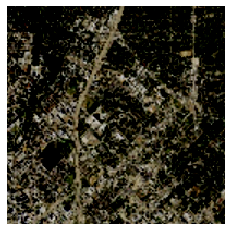

In [71]:
util.imshow(train_images_pil[0].permute(1, 2, 0).numpy())

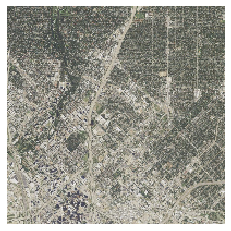

In [72]:
util.imshow(np.moveaxis(x_train_images[0]/255.0, 0, 2))

In [74]:
torch.stack(train_images_pil).size()

torch.Size([2000, 3, 200, 200])

#### Lessons Learnt.
1) Order matters. Start with ToPILImage; then image transformations; lastly to tensor. \
2) Syntax is always transform.fun()(x) \
3) A lot of annoying changes back and forth about channel-first vs. channel last and data types. \
4) Interestingly, the iteration is not as slow as I expected. \
5) Unclear how to augment data. I can treat transformed images as new observations or just new channels in the old images. 